### 1. Import Packages

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

print('All packages successfully loaded')

All packages successfully loaded


### 2. Load Data & Peak Sheet

In [2]:
df = pd.read_excel("/Users/nova/Desktop/Thesis/Metabolomics ML/data/MTBLS90.xlsx", index_col="Idx")
df.head()

/Users/nova/Programming/anaconda3/envs/thesis/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,SampleID,Class,Sex,M1,M2,M3,M4,M5,M6,M7,...,M180,M181,M182,M183,M184,M185,M186,M187,M188,M189
Idx,,,,,,,,,,,,,,,,,,,,,
1,subject_1524,0,Female,14.98474,14.49947,12.097435,12.043818,11.436392,16.07217,17.01090,...,20.70097,20.19814,21.28179,21.09176,16.46404,12.269896,17.29323,19.81546,19.35259,12.71608
2,subject_1525,1,Male,15.17667,14.50172,12.363773,12.240458,11.577436,14.93265,16.90847,...,21.68605,20.51608,21.25777,20.53935,16.33413,12.031267,18.08144,19.96693,19.50694,13.20891
3,subject_1527,1,Male,15.35934,14.41941,12.510494,11.234959,11.199970,15.22600,17.17192,...,20.46320,20.34297,21.34793,20.81883,16.44281,12.679043,17.24765,20.01505,20.34058,12.98210
4,subject_1528,1,Male,15.12638,14.75630,13.001426,12.640496,11.244146,14.78994,16.47827,...,21.36879,20.93957,21.09719,20.82021,16.27483,12.323163,17.72392,19.57522,19.18157,12.41039
5,subject_1529,1,Male,15.20272,14.48083,12.392280,10.779516,10.968423,15.75598,17.20552,...,20.80482,19.82493,20.84250,20.31349,16.33279,12.352881,17.59348,19.88594,18.66284,12.37479


### 3. Extract X & Y

In [3]:
X = df.drop(columns=['SampleID', 'Sex', 'Class'])
y = df.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()


,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M180,M181,M182,M183,M184,M185,M186,M187,M188,M189
Idx,,,,,,,,,,,,,,,,,,,,,
722,15.39796,14.91232,14.577826,11.740049,12.016078,15.98221,17.59492,12.367812,11.111374,14.30599,...,21.53344,20.34273,21.52205,20.63682,15.90004,12.153120,17.29561,18.84163,20.05504,11.52085
193,15.17609,14.54159,12.657440,12.271504,11.666542,15.08675,16.91058,12.240069,7.675780,14.01975,...,21.40537,20.70340,21.52211,21.31217,16.38168,12.326309,18.18686,19.48419,19.71400,12.49403
947,14.96150,14.55078,13.990449,12.081716,11.603965,15.38015,17.21484,12.024750,7.878469,13.46647,...,21.56322,21.23682,21.84273,21.02240,16.73516,12.866580,17.53839,19.41301,20.28007,12.44707
569,15.26684,14.16136,14.734711,11.975593,9.115411,15.71059,16.82914,12.338411,7.797287,14.53723,...,21.09744,20.29598,21.16500,20.42573,15.74209,10.891547,18.28504,19.27571,18.95617,12.08057
452,14.73499,14.59010,11.676631,11.127107,10.873536,15.52722,16.53072,12.159959,7.900248,15.00409,...,21.39141,20.08721,21.13493,20.90986,16.33872,12.339449,17.33932,19.07586,19.39272,11.91415


### 5. Build Model

In [35]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Creo una lista di indici per rappresentare le features
indexes = list(range(len(X_train.columns)))

# Ottengo l'importanza delle features dal modello
importances = model.feature_importances_

# Creo un DataFrame con indici delle features e le loro importanze
feature_importance = pd.DataFrame({"indexes": indexes, "importances": importances})
feature_importance.set_index("indexes", inplace=True)  # Imposto l'indice sulla colonna "indexes"

# Stampo la lista delle features con le relative importanze
best_values = feature_importance.sort_values(by="importances", ascending=False)

best_features = []
for i, importance in best_values.iterrows() :
    if importance > 0.1:
        best_features.append(i)

print(best_features)
        




[]


### 6. Plotting

### 6.1 Heatmap Correlation

<Axes: >

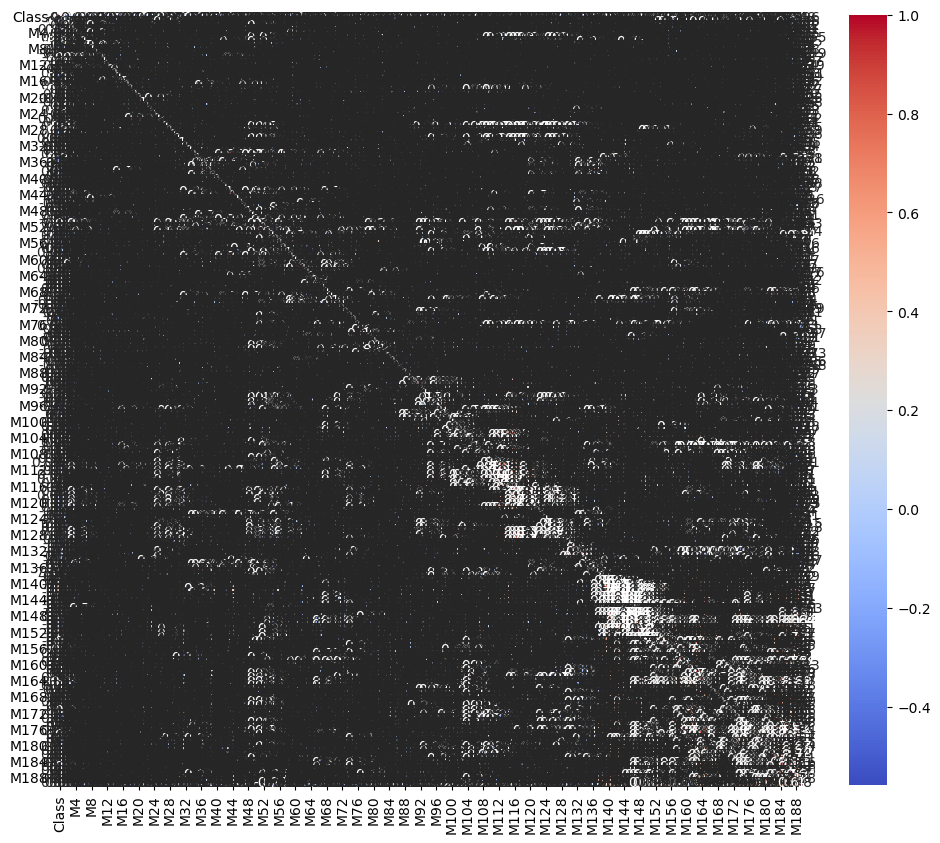

In [5]:
df2 = df.drop(columns=['SampleID', 'Sex'])
correlation_matrix = df2.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
